In [1]:
import pandas as pd
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, early_stopping
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold, StratifiedKFold

import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [4]:
d_code = pd.read_csv('속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('속성_L_코드.csv', index_col=0).T.to_dict()

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df = add_code(df_train, d_code, h_code, l_code)
test = add_code(df_test, d_code, h_code, l_code)

In [5]:
print(df.shape)
print(test.shape)

(501951, 63)
(46404, 62)


# 데이터 전처리

Class Count 
 0    251106
1    250845
Name: target, dtype: int64 

Label1 50.03 % of the dataset
Lable2 49.97 % of the dataset


<AxesSubplot:title={'center':'Class Distributions \n (0: Unused || 1: Used)'}, xlabel='target', ylabel='count'>

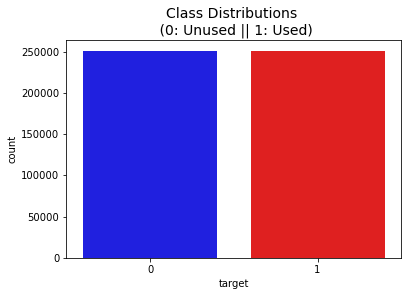

In [6]:
print('Class Count','\n',df['target'].value_counts(),'\n')
print('Label1', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Lable2', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
plt.title('Class Distributions \n (0: Unused || 1: Used)', fontsize=14)
colors = ["blue", "red"]
sns.countplot(df['target'],palette=colors)

In [7]:
drop_columns = ['id','person_rn','contents_rn','contents_open_dt', 'person_prefer_f','person_prefer_g']
df = df.drop(drop_columns,axis=1)

In [8]:
pd.set_option('display.max_columns', None)
df.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
5,False,False,False,True,False,False,1,1,2,5,175,181,114,4,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,1,175,152,56,1,175,152,56,1,114,109,56,1,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
6,False,False,False,True,False,False,2,0,3,5,672,180,740,3,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,0,672,660,659,618,175,152,56,1,740,735,716,618,490,490,482,482,48,359,250,518,250,523,48,363,1812,1811,1810,2020
7,True,False,False,True,False,False,1,2,2,1,372,299,147,5,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,1,369,368,297,216,299,298,297,216,145,123,56,1,275,274,274,216,94,412,94,422,94,399,94,417,1607,1606,1605,2016
8,True,True,False,True,False,False,1,1,2,5,1027,1229,929,5,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,0,1027,1026,1000,926,1227,1227,1227,926,929,928,927,926,1027,1026,1000,926,94,421,58,376,94,403,94,422,529,528,527,2006
9,False,False,False,True,False,False,1,5,2,1,851,698,1228,5,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,0,847,847,824,744,697,691,690,618,1227,1227,1227,926,1227,1227,1227,926,94,407,94,413,94,422,94,422,721,694,693,2006


In [9]:
encoder = LabelEncoder()
list1 = ['d_l_match_yn','d_m_match_yn','d_s_match_yn','h_l_match_yn','h_m_match_yn','h_s_match_yn']
for i in list1:
    df[i] = encoder.fit_transform(df[i])

df.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
5,0,0,0,1,0,0,1,1,2,5,175,181,114,4,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,1,175,152,56,1,175,152,56,1,114,109,56,1,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
6,0,0,0,1,0,0,2,0,3,5,672,180,740,3,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,0,672,660,659,618,175,152,56,1,740,735,716,618,490,490,482,482,48,359,250,518,250,523,48,363,1812,1811,1810,2020
7,1,0,0,1,0,0,1,2,2,1,372,299,147,5,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,1,369,368,297,216,299,298,297,216,145,123,56,1,275,274,274,216,94,412,94,422,94,399,94,417,1607,1606,1605,2016
8,1,1,0,1,0,0,1,1,2,5,1027,1229,929,5,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,0,1027,1026,1000,926,1227,1227,1227,926,929,928,927,926,1027,1026,1000,926,94,421,58,376,94,403,94,422,529,528,527,2006
9,0,0,0,1,0,0,1,5,2,1,851,698,1228,5,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,0,847,847,824,744,697,691,690,618,1227,1227,1227,926,1227,1227,1227,926,94,407,94,413,94,422,94,422,721,694,693,2006


In [10]:
df.shape

(501951, 57)

In [11]:
X = df.drop(['target'],axis=1,inplace=False)
y = df['target']

In [12]:
X.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [13]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [14]:
# train, test 분리
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# 검증세트 분할하기
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.2)
print(len(X_train), len(X_val))

321248 80312


# optuna 하이퍼 파라미터 튜닝

In [15]:
import optuna

In [16]:
df.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [17]:
feature_cols = [col for col in df.columns.tolist() if col not in ['id', 'target']]
target_col = ['target']

In [18]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for i, (trn, val) in enumerate(skf.split(df, df[target_col])):
    df.loc[val, 'kfold'] = i
df['kfold'] = df['kfold'].astype(int)

In [19]:
def fit_lgb(trial, xtr, ytr, xval, yval):
    params = {
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "objective": "binary",
        "metric": "binary_error",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "n_estimators": trial.suggest_int("n_estimators",200,2000,100),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.05),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
    }
    
    es = early_stopping(30)
    
    model = LGBMClassifier(**params)
    model.fit(xtr, ytr.reshape(-1,), eval_set=[(xval, yval.reshape(-1,))],eval_metric='binary_logloss', callbacks=[es])
        
    y_val_pred = model.predict_proba(xval)
    
    log = {
        "train logloss": log_loss(ytr, model.predict_proba(xtr)),
        "valid logloss": log_loss(yval, y_val_pred)
    }
    
    return model, log

In [20]:
def objective(trial):
    loss = 0
    for fold in range(5):
        trn_idx = df['kfold'] != fold
        val_idx = df['kfold'] == fold
        trn = df.loc[trn_idx, :]
        val = df.loc[val_idx, :]

        xtr, ytr = trn[feature_cols].values, trn[target_col].values
        xval, yval = val[feature_cols].values, val[target_col].values
        
        model, log = fit_lgb(trial, xtr, ytr, xval, yval)
        loss += log['valid logloss']/5
        
    return loss

In [21]:
study = optuna.create_study(direction="minimize", study_name='lgbboost optimization')
study.optimize(objective, n_trials=20)

[I 2022-01-20 10:56:30,046] A new study created in memory with name: lgbboost optimization


[LightGBM] [Warning] feature_fraction is set=0.9140117568627474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9140117568627474
[LightGBM] [Warning] lambda_l1 is set=3.446061045413928e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.446061045413928e-07
[LightGBM] [Warning] bagging_fraction is set=0.471869548622016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.471869548622016
[LightGBM] [Warning] lambda_l2 is set=7.721472058949925e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.721472058949925e-08
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[269]	valid_0's binary_logloss: 0.641952	valid_0's binary_error: 0.372713
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	valid_0's binary_logloss: 0.640721	valid_0

[I 2022-01-20 10:58:58,517] Trial 0 finished with value: 0.6426453944313535 and parameters: {'device_type': 'gpu', 'n_estimators': 1000, 'learning_rate': 0.02494945174251024, 'lambda_l1': 3.446061045413928e-07, 'lambda_l2': 7.721472058949925e-08, 'num_leaves': 307, 'feature_fraction': 0.9140117568627474, 'bagging_fraction': 0.471869548622016, 'bagging_freq': 9, 'min_child_samples': 8}. Best is trial 0 with value: 0.6426453944313535.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.649837	valid_0's binary_error: 0.382225
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.650634	valid_0's binary_error: 0.38454
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.651177	valid_0's binary_error: 0.386064
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.651281	valid_0's binary_error: 0.38449
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.649845	valid_0's binary_error: 0.38202


[I 2022-01-20 11:01:33,736] Trial 1 finished with value: 0.650554775112081 and parameters: {'device_type': 'gpu', 'n_estimators': 500, 'learning_rate': 0.006179892082405445, 'lambda_l1': 3.3978767619935836e-06, 'lambda_l2': 4.3346383371766734e-05, 'num_leaves': 203, 'feature_fraction': 0.2834266826095522, 'bagging_fraction': 0.7448073626098766, 'bagging_freq': 6, 'min_child_samples': 59}. Best is trial 0 with value: 0.6426453944313535.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	valid_0's binary_logloss: 0.636252	valid_0's binary_error: 0.365949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	valid_0's binary_logloss: 0.636912	valid_0's binary_error: 0.368015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[328]	valid_0's binary_logloss: 0.640777	valid_0's binary_error: 0.372647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	valid_0's binary_logloss: 0.637978	valid_0's binary_error: 0.368961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[438]	valid_0's binary_logloss: 0.636369	valid_0's binary_error: 0.365694


[I 2022-01-20 11:05:53,106] Trial 2 finished with value: 0.6376574941492759 and parameters: {'device_type': 'gpu', 'n_estimators': 1200, 'learning_rate': 0.019051258517962504, 'lambda_l1': 2.17181825917325e-06, 'lambda_l2': 1.6340552654111968e-06, 'num_leaves': 426, 'feature_fraction': 0.3711683160889895, 'bagging_fraction': 0.9938680902887723, 'bagging_freq': 12, 'min_child_samples': 46}. Best is trial 2 with value: 0.6376574941492759.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	valid_0's binary_logloss: 0.644792	valid_0's binary_error: 0.37603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	valid_0's binary_logloss: 0.64139	valid_0's binary_error: 0.373264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	valid_0's binary_logloss: 0.64491	valid_0's binary_error: 0.378613
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	valid_0's binary_logloss: 0.645801	valid_0's binary_error: 0.379201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[290]	valid_0's binary_logloss: 0.650331	valid_0's binary_error: 0.382807


[I 2022-01-20 11:07:32,840] Trial 3 finished with value: 0.6454449251675157 and parameters: {'device_type': 'gpu', 'n_estimators': 1700, 'learning_rate': 0.02007454034768766, 'lambda_l1': 0.8143735547547446, 'lambda_l2': 0.004297061017642009, 'num_leaves': 98, 'feature_fraction': 0.13187176463806594, 'bagging_fraction': 0.4104358831033893, 'bagging_freq': 8, 'min_child_samples': 77}. Best is trial 2 with value: 0.6376574941492759.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[332]	valid_0's binary_logloss: 0.637826	valid_0's binary_error: 0.368519
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	valid_0's binary_logloss: 0.637659	valid_0's binary_error: 0.369917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	valid_0's binary_logloss: 0.638033	valid_0's binary_error: 0.369678
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	valid_0's binary_logloss: 0.637683	valid_0's binary_error: 0.369917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	valid_0's binary_logloss: 0.636078	valid_0's binary_error: 0.366491


[I 2022-01-20 11:09:23,760] Trial 4 finished with value: 0.6374555559941443 and parameters: {'device_type': 'gpu', 'n_estimators': 800, 'learning_rate': 0.049435562392800156, 'lambda_l1': 1.903945846188938e-07, 'lambda_l2': 2.808730288795919e-06, 'num_leaves': 140, 'feature_fraction': 0.42843910939959085, 'bagging_fraction': 0.8019516648157172, 'bagging_freq': 8, 'min_child_samples': 54}. Best is trial 4 with value: 0.6374555559941443.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	valid_0's binary_logloss: 0.633316	valid_0's binary_error: 0.36327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	valid_0's binary_logloss: 0.633124	valid_0's binary_error: 0.36417
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	valid_0's binary_logloss: 0.635495	valid_0's binary_error: 0.367586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	valid_0's binary_logloss: 0.63371	valid_0's binary_error: 0.36415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.634898	valid_0's binary_error: 0.364787


[I 2022-01-20 11:13:52,238] Trial 5 finished with value: 0.6341086695492293 and parameters: {'device_type': 'gpu', 'n_estimators': 900, 'learning_rate': 0.02885033100098374, 'lambda_l1': 0.002470640266457679, 'lambda_l2': 0.0004015941873025979, 'num_leaves': 468, 'feature_fraction': 0.4525539612307117, 'bagging_fraction': 0.47491859199199005, 'bagging_freq': 0, 'min_child_samples': 75}. Best is trial 5 with value: 0.6341086695492293.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[799]	valid_0's binary_logloss: 0.639715	valid_0's binary_error: 0.370541
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[742]	valid_0's binary_logloss: 0.640996	valid_0's binary_error: 0.373015
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[800]	valid_0's binary_logloss: 0.641785	valid_0's binary_error: 0.375954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	valid_0's binary_logloss: 0.648037	valid_0's binary_error: 0.382568
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[800]	valid_0's binary_logloss: 0.640073	valid_0's binary_error: 0.371621


[I 2022-01-20 11:16:54,088] Trial 6 finished with value: 0.6421211995461178 and parameters: {'device_type': 'gpu', 'n_estimators': 800, 'learning_rate': 0.013835628879425117, 'lambda_l1': 2.917710400696066e-08, 'lambda_l2': 8.096361426311057e-07, 'num_leaves': 156, 'feature_fraction': 0.5535575910237426, 'bagging_fraction': 0.6658091211928048, 'bagging_freq': 8, 'min_child_samples': 4}. Best is trial 5 with value: 0.6341086695492293.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.681128	valid_0's binary_error: 0.390324
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[600]	valid_0's binary_logloss: 0.647008	valid_0's binary_error: 0.380934
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	valid_0's binary_logloss: 0.653125	valid_0's binary_error: 0.387668
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[116]	valid_0's binary_logloss: 0.668941	valid_0's binary_error: 0.391125
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[600]	valid_0's binary_logloss: 0.64633	valid_0's binary_error: 0.378245


[I 2022-01-20 11:20:17,390] Trial 7 finished with value: 0.6593064355170579 and parameters: {'device_type': 'gpu', 'n_estimators': 600, 'learning_rate': 0.0053752050415309, 'lambda_l1': 0.00012982024984537155, 'lambda_l2': 7.402493542886747, 'num_leaves': 390, 'feature_fraction': 0.8050740118288887, 'bagging_fraction': 0.7501604327142153, 'bagging_freq': 11, 'min_child_samples': 77}. Best is trial 5 with value: 0.6341086695492293.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[947]	valid_0's binary_logloss: 0.631496	valid_0's binary_error: 0.360949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	valid_0's binary_logloss: 0.634649	valid_0's binary_error: 0.364518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	valid_0's binary_logloss: 0.634355	valid_0's binary_error: 0.364259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	valid_0's binary_logloss: 0.636735	valid_0's binary_error: 0.367118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[958]	valid_0's binary_logloss: 0.631721	valid_0's binary_error: 0.360285


[I 2022-01-20 11:26:31,573] Trial 8 finished with value: 0.6337912952932983 and parameters: {'device_type': 'gpu', 'n_estimators': 1000, 'learning_rate': 0.0171335281627568, 'lambda_l1': 0.025693077514813787, 'lambda_l2': 0.00012845517483705768, 'num_leaves': 413, 'feature_fraction': 0.21333154034432134, 'bagging_fraction': 0.20858030566544028, 'bagging_freq': 0, 'min_child_samples': 45}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	valid_0's binary_logloss: 0.638635	valid_0's binary_error: 0.369555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	valid_0's binary_logloss: 0.638474	valid_0's binary_error: 0.369369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	valid_0's binary_logloss: 0.639398	valid_0's binary_error: 0.372228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	valid_0's binary_logloss: 0.639555	valid_0's binary_error: 0.372059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	valid_0's binary_logloss: 0.639398	valid_0's binary_error: 0.370973


[I 2022-01-20 11:31:57,248] Trial 9 finished with value: 0.6390917888670409 and parameters: {'device_type': 'gpu', 'n_estimators': 1900, 'learning_rate': 0.012339905933998844, 'lambda_l1': 0.17395768818903282, 'lambda_l2': 0.005856857824656708, 'num_leaves': 317, 'feature_fraction': 0.7738268942127391, 'bagging_fraction': 0.808209594056213, 'bagging_freq': 12, 'min_child_samples': 50}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.689078	valid_0's binary_error: 0.413932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.689092	valid_0's binary_error: 0.416296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.68664	valid_0's binary_error: 0.417004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.688068	valid_0's binary_error: 0.414185
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.688021	valid_0's binary_error: 0.41278


[I 2022-01-20 11:32:03,803] Trial 10 finished with value: 0.6881797510057857 and parameters: {'device_type': 'gpu', 'n_estimators': 1400, 'learning_rate': 0.008983948829303444, 'lambda_l1': 0.005121541597313999, 'lambda_l2': 0.8391477946521794, 'num_leaves': 8, 'feature_fraction': 0.10676416875748918, 'bagging_fraction': 0.106264586741412, 'bagging_freq': 0, 'min_child_samples': 27}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.637664	valid_0's binary_error: 0.368469
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.638821	valid_0's binary_error: 0.371421
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.639888	valid_0's binary_error: 0.37168
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.64052	valid_0's binary_error: 0.373892
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.638187	valid_0's binary_error: 0.370097


[I 2022-01-20 11:34:00,253] Trial 11 finished with value: 0.639015761098852 and parameters: {'device_type': 'gpu', 'n_estimators': 200, 'learning_rate': 0.033415443386167164, 'lambda_l1': 0.004169736683666025, 'lambda_l2': 0.00033821455229992865, 'num_leaves': 509, 'feature_fraction': 0.5588971404659415, 'bagging_fraction': 0.24548050276061625, 'bagging_freq': 0, 'min_child_samples': 97}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	valid_0's binary_logloss: 0.63878	valid_0's binary_error: 0.369625
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	valid_0's binary_logloss: 0.639599	valid_0's binary_error: 0.371561
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	valid_0's binary_logloss: 0.641758	valid_0's binary_error: 0.37433
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	valid_0's binary_logloss: 0.645378	valid_0's binary_error: 0.37956
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[271]	valid_0's binary_logloss: 0.643002	valid_0's binary_error: 0.374978


[I 2022-01-20 11:39:03,077] Trial 12 finished with value: 0.6417031889724479 and parameters: {'device_type': 'gpu', 'n_estimators': 1400, 'learning_rate': 0.03014592598797277, 'lambda_l1': 9.801631154278226, 'lambda_l2': 0.023309136486276583, 'num_leaves': 508, 'feature_fraction': 0.2757247413641688, 'bagging_fraction': 0.3128080585068346, 'bagging_freq': 3, 'min_child_samples': 30}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[198]	valid_0's binary_logloss: 0.645977	valid_0's binary_error: 0.380711
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[209]	valid_0's binary_logloss: 0.647225	valid_0's binary_error: 0.382927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[188]	valid_0's binary_logloss: 0.648614	valid_0's binary_error: 0.382976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[197]	valid_0's binary_logloss: 0.648337	valid_0's binary_error: 0.383823
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[147]	valid_0's binary_logloss: 0.647053	valid_0's binary_error: 0.38207


[I 2022-01-20 11:41:02,802] Trial 13 finished with value: 0.6474413596344724 and parameters: {'device_type': 'gpu', 'n_estimators': 1100, 'learning_rate': 0.04148180739763573, 'lambda_l1': 0.0002900301648722401, 'lambda_l2': 0.00012268255074443076, 'num_leaves': 416, 'feature_fraction': 0.450510538232625, 'bagging_fraction': 0.10403332268748178, 'bagging_freq': 3, 'min_child_samples': 73}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's binary_logloss: 0.643713	valid_0's binary_error: 0.374595
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's binary_logloss: 0.644709	valid_0's binary_error: 0.378285
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's binary_logloss: 0.645721	valid_0's binary_error: 0.37954
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's binary_logloss: 0.645791	valid_0's binary_error: 0.379809
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[400]	valid_0's binary_logloss: 0.644105	valid_0's binary_error: 0.375774


[I 2022-01-20 11:44:44,071] Trial 14 finished with value: 0.6448076832593266 and parameters: {'device_type': 'gpu', 'n_estimators': 400, 'learning_rate': 0.009831487494871515, 'lambda_l1': 0.016497013483461553, 'lambda_l2': 0.09784164204919964, 'num_leaves': 363, 'feature_fraction': 0.6386568732784417, 'bagging_fraction': 0.5887159679853631, 'bagging_freq': 3, 'min_child_samples': 96}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	valid_0's binary_logloss: 0.639442	valid_0's binary_error: 0.371507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	valid_0's binary_logloss: 0.640007	valid_0's binary_error: 0.37179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	valid_0's binary_logloss: 0.639008	valid_0's binary_error: 0.370953
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	valid_0's binary_logloss: 0.638921	valid_0's binary_error: 0.370794
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	valid_0's binary_logloss: 0.639367	valid_0's binary_error: 0.369698


[I 2022-01-20 11:49:36,347] Trial 15 finished with value: 0.6393491142225375 and parameters: {'device_type': 'gpu', 'n_estimators': 800, 'learning_rate': 0.021954674332292326, 'lambda_l1': 6.727020317233746e-05, 'lambda_l2': 0.00027402185995443665, 'num_leaves': 459, 'feature_fraction': 0.2507150916044321, 'bagging_fraction': 0.2897566118037104, 'bagging_freq': 5, 'min_child_samples': 32}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	valid_0's binary_logloss: 0.63669	valid_0's binary_error: 0.367892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	valid_0's binary_logloss: 0.641445	valid_0's binary_error: 0.373972
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	valid_0's binary_logloss: 0.641716	valid_0's binary_error: 0.37431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	valid_0's binary_logloss: 0.639614	valid_0's binary_error: 0.371571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	valid_0's binary_logloss: 0.639318	valid_0's binary_error: 0.370804


[I 2022-01-20 11:54:48,003] Trial 16 finished with value: 0.6397564324403502 and parameters: {'device_type': 'gpu', 'n_estimators': 1400, 'learning_rate': 0.01511157201200474, 'lambda_l1': 0.04829071829751818, 'lambda_l2': 1.6215301156184734e-05, 'num_leaves': 297, 'feature_fraction': 0.6758687968658613, 'bagging_fraction': 0.4419132422604941, 'bagging_freq': 1, 'min_child_samples': 66}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	valid_0's binary_logloss: 0.639586	valid_0's binary_error: 0.372693
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[340]	valid_0's binary_logloss: 0.642032	valid_0's binary_error: 0.375695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	valid_0's binary_logloss: 0.642704	valid_0's binary_error: 0.375476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[266]	valid_0's binary_logloss: 0.645031	valid_0's binary_error: 0.379181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[334]	valid_0's binary_logloss: 0.641375	valid_0's binary_error: 0.372188


[I 2022-01-20 11:57:44,991] Trial 17 finished with value: 0.6421457336659586 and parameters: {'device_type': 'gpu', 'n_estimators': 1000, 'learning_rate': 0.028961823100855624, 'lambda_l1': 0.0016496991841497125, 'lambda_l2': 1.399980799106035e-08, 'num_leaves': 354, 'feature_fraction': 0.20605843230239307, 'bagging_fraction': 0.21222422425148368, 'bagging_freq': 15, 'min_child_samples': 87}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[364]	valid_0's binary_logloss: 0.636771	valid_0's binary_error: 0.367433
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	valid_0's binary_logloss: 0.638939	valid_0's binary_error: 0.37167
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	valid_0's binary_logloss: 0.639028	valid_0's binary_error: 0.37181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	valid_0's binary_logloss: 0.63882	valid_0's binary_error: 0.370754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	valid_0's binary_logloss: 0.636333	valid_0's binary_error: 0.367527


[I 2022-01-20 12:00:21,718] Trial 18 finished with value: 0.6379781445174308 and parameters: {'device_type': 'gpu', 'n_estimators': 1600, 'learning_rate': 0.03623353234110728, 'lambda_l1': 0.5774818792011446, 'lambda_l2': 0.00206777399102575, 'num_leaves': 245, 'feature_fraction': 0.35896823378481235, 'bagging_fraction': 0.530764747095895, 'bagging_freq': 2, 'min_child_samples': 38}. Best is trial 8 with value: 0.6337912952932983.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	valid_0's binary_logloss: 0.63546	valid_0's binary_error: 0.364933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[246]	valid_0's binary_logloss: 0.643348	valid_0's binary_error: 0.376631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	valid_0's binary_logloss: 0.639355	valid_0's binary_error: 0.37189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	valid_0's binary_logloss: 0.639138	valid_0's binary_error: 0.371083
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	valid_0's binary_logloss: 0.637218	valid_0's binary_error: 0.368792


[I 2022-01-20 12:05:23,671] Trial 19 finished with value: 0.6389040022944563 and parameters: {'device_type': 'gpu', 'n_estimators': 700, 'learning_rate': 0.018441587562528273, 'lambda_l1': 2.3782961234453552e-05, 'lambda_l2': 1.0337222371684447e-05, 'num_leaves': 459, 'feature_fraction': 0.4816893991731126, 'bagging_fraction': 0.3737388426609408, 'bagging_freq': 6, 'min_child_samples': 65}. Best is trial 8 with value: 0.6337912952932983.


In [22]:
history = study.trials_dataframe()
history.sort_values(by="value", ascending=True)

,number,value,datetime_start,datetime_complete,duration,params_bagging_fraction,params_bagging_freq,params_device_type,params_feature_fraction,params_lambda_l1,params_lambda_l2,params_learning_rate,params_min_child_samples,params_n_estimators,params_num_leaves,state
8,8,0.633791,2022-01-20 11:20:17.390577,2022-01-20 11:26:31.572669,0 days 00:06:14.182092,0.208580,0,gpu,0.213332,2.569308e-02,1.284552e-04,0.017134,45,1000,413,COMPLETE
5,5,0.634109,2022-01-20 11:09:23.761523,2022-01-20 11:13:52.237806,0 days 00:04:28.476283,0.474919,0,gpu,0.452554,2.470640e-03,4.015942e-04,0.028850,75,900,468,COMPLETE
4,4,0.637456,2022-01-20 11:07:32.840134,2022-01-20 11:09:23.760523,0 days 00:01:50.920389,0.801952,8,gpu,0.428439,1.903946e-07,2.808730e-06,0.049436,54,800,140,COMPLETE
2,2,0.637657,2022-01-20 11:01:33.737562,2022-01-20 11:05:53.105757,0 days 00:04:19.368195,0.993868,12,gpu,0.371168,2.171818e-06,1.634055e-06,0.019051,46,1200,426,COMPLETE
18,18,0.637978,2022-01-20 11:57:44.991624,2022-01-20 12:00:21.718615,0 days 00:02:36.726991,0.530765,2,gpu,0.358968,5.774819e-01,2.067774e-03,0.036234,38,1600,245,COMPLETE
19,19,0.638904,2022-01-20 12:00:21.720616,2022-01-20 12:05:23.671287,0 days 00:05:01.950671,0.373739,6,gpu,0.481689,2.378296e-05,1.033722e-05,0.018442,65,700,459,COMPLETE
11,11,0.639016,2022-01-20 11:32:03.803163,2022-01-20 11:34:00.253328,0 days 00:01:56.450165,0.245481,0,gpu,0.558897,4.169737e-03,3.382146e-04,0.033415,97,200,509,COMPLETE
9,9,0.639092,2022-01-20 11:26:31.573670,2022-01-20 11:31:57.248692,0 days 00:05:25.675022,0.808210,12,gpu,0.773827,1.739577e-01,5.856858e-03,0.012340,50,1900,317,COMPLETE
15,15,0.639349,2022-01-20 11:44:44.072777,2022-01-20 11:49:36.347302,0 days 00:04:52.274525,0.289757,5,gpu,0.250715,6.727020e-05,2.740219e-04,0.021955,32,800,459,COMPLETE
16,16,0.639756,2022-01-20 11:49:36.348303,2022-01-20 11:54:48.003348,0 days 00:05:11.655045,0.441913,1,gpu,0.675869,4.829072e-02,1.621530e-05,0.015112,66,1400,297,COMPLETE


In [23]:
study.best_params

{'device_type': 'gpu',
 'n_estimators': 1000,
 'learning_rate': 0.0171335281627568,
 'lambda_l1': 0.025693077514813787,
 'lambda_l2': 0.00012845517483705768,
 'num_leaves': 413,
 'feature_fraction': 0.21333154034432134,
 'bagging_fraction': 0.20858030566544028,
 'bagging_freq': 0,
 'min_child_samples': 45}

In [24]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    f1 = f1_score(y_test,pred)
    print('F1:',f1.round(3))

In [25]:
# optuna로 구한 최적 하이퍼 파라미터로 설정
lgb_clf = LGBMClassifier(device_type="gpu", n_estimators=1000, learning_rate=  0.0171335281627568, 
                         lambda_l1=0.025693077514813787, lambda_l2=0.00012845517483705768, 
                         num_leaves=413, feature_fraction=0.21333154034432134, bagging_fraction=0.20858030566544028,
                         bagging_freq=0, min_child_samples=45, objective='binary')

es = early_stopping(200)

# 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
lgb_clf.fit(X_train, y_train, callbacks=[es],
            eval_metric="binary_logloss", eval_set=[(X_val, y_val)])

pred = lgb_clf.predict(X_test)
get_clf_eval(y_test,pred)

[LightGBM] [Warning] feature_fraction is set=0.21333154034432134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21333154034432134
[LightGBM] [Warning] lambda_l1 is set=0.025693077514813787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025693077514813787
[LightGBM] [Warning] bagging_fraction is set=0.20858030566544028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20858030566544028
[LightGBM] [Warning] lambda_l2 is set=0.00012845517483705768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012845517483705768
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 160541, number of negative: 160707
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 5290
[LightGBM] [Info] Number of data points in the train set: 321248, number of used features: 56
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060, Ve

In [26]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값',custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)
        print('\n')

In [27]:
pred_proba = lgb_clf.predict_proba(X_test)[:,1]
thresholds = [0.3,0.35,0.38,0.4,0.45,0.5,0.55,0.6]
get_eval_by_threshold(y_test,pred_proba.reshape(-1,1),thresholds)

[LightGBM] [Warning] feature_fraction is set=0.21333154034432134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21333154034432134
[LightGBM] [Warning] lambda_l1 is set=0.025693077514813787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025693077514813787
[LightGBM] [Warning] bagging_fraction is set=0.20858030566544028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20858030566544028
[LightGBM] [Warning] lambda_l2 is set=0.00012845517483705768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012845517483705768
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
임계값 0.3
F1: 0.692


임계값 0.35
F1: 0.696


임계값 0.38
F1: 0.695


임계값 0.4
F1: 0.694


임계값 0.45
F1: 0.683


임계값 0.5
F1: 0.65


임계값 0.55
F1: 0.591


임계값 0.6
F1: 0.49




<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

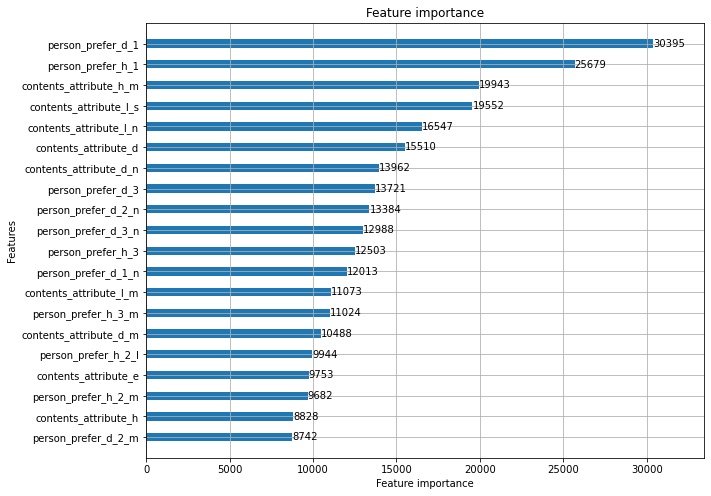

In [28]:
from lightgbm import plot_importance

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(lgb_clf, ax=ax, max_num_features=20, height=0.4)

# 테스트 데이터 전처리

In [29]:
# 학습에 불필요한 열인 id, person_rn(사용자번호), contents_rn(컨텐츠번호), contents_open_df(컨텐츠 열람 일시) 제거
drop_columns = ['id','person_rn','contents_rn','contents_open_dt', 'person_prefer_f','person_prefer_g']
test = test.drop(drop_columns,axis=1)
test

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,True,True,True,False,False,False,2,0,4,1,147,46,145,4,2,4,95,3,3,5,1,1,2,759,147,1,5,91,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,1,315,3,316,94,398,85,396,759,759,759,2006
46400,True,False,False,True,False,False,2,0,4,1,176,120,159,4,86,31,278,3,3,10,2,1,2,759,147,1,4,91,175,152,56,1,114,109,56,1,159,152,56,1,145,123,56,1,85,391,30,342,277,542,85,396,759,759,759,2006
46401,True,True,False,True,True,True,2,0,3,1,145,46,147,5,288,279,278,3,3,10,2,1,2,759,147,1,4,288,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006
46402,True,True,False,True,True,True,1,3,3,2,145,46,147,6,288,279,278,3,1,5,1,3,2,759,147,1,5,288,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006


In [30]:
for i in list1:
    test[i] = encoder.fit_transform(test[i])

test.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,0,0,1,1,1,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,0,0,0,1,0,0,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,1,0,0,1,1,1,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,1,0,0,1,1,1,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,1,0,0,1,0,0,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009
5,0,0,0,0,0,0,1,2,3,1,181,175,114,4,171,190,93,3,1,5,1,3,2,1463,1095,1,4,93,175,152,56,1,175,152,56,1,114,109,56,1,1095,1094,1093,926,169,452,188,464,92,397,92,397,1462,1459,1458,2013
6,0,0,0,1,0,0,2,0,4,5,800,182,819,4,79,93,93,2,3,5,1,1,2,953,1097,1,4,83,800,783,745,744,182,152,56,1,819,815,745,744,1097,1094,1093,926,78,385,92,397,92,397,78,389,952,951,930,2009
7,1,0,0,1,0,0,2,0,4,5,461,101,180,4,38,36,45,1,1,3,1,3,2,1851,453,4,3,44,461,451,450,377,101,91,56,1,175,152,56,1,452,451,450,377,30,349,30,347,30,356,30,355,1846,1843,1832,2020
8,1,0,0,1,0,0,2,0,4,5,436,464,396,3,31,278,86,3,3,9,2,3,2,1851,453,1,2,44,436,431,378,377,464,463,450,377,396,396,378,377,452,451,450,377,30,342,277,542,85,391,30,355,1846,1843,1832,2020
9,0,0,0,0,0,0,1,7,2,5,923,896,851,6,59,95,4,1,3,10,2,1,2,530,1228,5,4,117,923,923,864,864,895,884,864,864,847,847,824,744,1227,1227,1227,926,58,368,94,398,3,316,94,407,529,528,527,2006


# 최종 예측

In [31]:
final_pred = lgb_clf.predict_proba(test)[:,1]
final_pred

[LightGBM] [Warning] feature_fraction is set=0.21333154034432134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21333154034432134
[LightGBM] [Warning] lambda_l1 is set=0.025693077514813787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025693077514813787
[LightGBM] [Warning] bagging_fraction is set=0.20858030566544028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20858030566544028
[LightGBM] [Warning] lambda_l2 is set=0.00012845517483705768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012845517483705768
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


array([0.64426427, 0.38248045, 0.41600139, ..., 0.63377883, 0.65542991,
       0.73504432])

In [32]:
threshold=0.35
final_pred = np.where(final_pred >= threshold , 1, 0)
final_pred

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission['target'] = final_pred
sample_submission

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [34]:
sample_submission['target'].value_counts()

1    38478
0     7926
Name: target, dtype: int64

In [35]:
sample_submission.to_csv('sample_submission(lightgbm).csv', index=False, encoding='utf-8-sig')